In [1]:
##-----------------------------------------------------------------------------
## Import
##-----------------------------------------------------------------------------
import time
import os
import h5py
import math
#import warnings
#warnings.simplefilter(action = "ignore", category = RuntimeWarning)

import scipy.io as sio 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.callbacks import TensorBoard
#from newv_focal_loss import *

##-----------------------------------------------------------------------------
## GPU Selection
##-----------------------------------------------------------------------------
os.environ['CUDA_VISIBLE_DEVICES']='0'
tf.reset_default_graph()

Using TensorFlow backend.


In [2]:
##-----------------------------------------------------------------------------
## Load data
##-----------------------------------------------------------------------------
DataIntensity1 = h5py.File('../augbroken1.mat', 'r')
Intensity1 = np.array(DataIntensity1.get('dataCrop'))
DataIntensity2 = h5py.File('../augbroken2.mat', 'r')
Intensity2 = np.array(DataIntensity2.get('dataCrop'))
DataIntensity3 = h5py.File('../augbroken3.mat', 'r')
Intensity3 = np.array(DataIntensity3.get('dataCrop'))
DataIntensity4 = h5py.File('../augbroken4.mat', 'r')
Intensity4 = np.array(DataIntensity4.get('dataCrop'))

DataIntensity5 = h5py.File('../auggood1.mat', 'r')
Intensity5 = np.array(DataIntensity5.get('dataCrop'))
DataIntensity6 = h5py.File('../auggood2.mat', 'r')
Intensity6 = np.array(DataIntensity6.get('dataCrop'))
DataIntensity7 = h5py.File('../auggood1.mat', 'r')
Intensity7 = np.array(DataIntensity7.get('dataCrop'))
DataIntensity8 = h5py.File('../auggood2.mat', 'r')
Intensity8 = np.array(DataIntensity8.get('dataCrop'))

#Intensity = Intensity.T
DataType1 = sio.loadmat('../augbrokentype1.mat')
Type1 = np.array(DataType1['dataType'])
DataType2 = sio.loadmat('../augbrokentype2.mat')
Type2 = np.array(DataType2['dataType'])
DataType3 = sio.loadmat('../augbrokentype3.mat')
Type3 = np.array(DataType3['dataType'])
DataType4 = sio.loadmat('../augbrokentype4.mat')
Type4 = np.array(DataType4['dataType'])

DataType5 = sio.loadmat('../auggoodtype1.mat')
Type5 = np.array(DataType5['dataType'])
DataType6 = sio.loadmat('../auggoodtype2.mat')
Type6 = np.array(DataType6['dataType'])
DataType7 = sio.loadmat('../auggoodtype1.mat')
Type7 = np.array(DataType7['dataType'])
DataType8 = sio.loadmat('../auggoodtype2.mat')
Type8 = np.array(DataType8['dataType'])

In [3]:
MaxIntensity = 65535

In [4]:
print("Intensity1.shape={}, Intensity2.shape={}".format(Intensity1.shape, Intensity2.shape))
print("Intensity3.shape={}, Intensity4.shape={}".format(Intensity3.shape, Intensity4.shape))
print("Intensity5.shape={}, Intensity6.shape={}".format(Intensity5.shape, Intensity6.shape))
print("Intensity7.shape={}, Intensity8.shape={}".format(Intensity7.shape, Intensity8.shape))
print("Type1.shape={}, Type2.shape={}".format(Type1.shape, Type2.shape))
print("Type3.shape={}, Type4.shape={}".format(Type3.shape, Type4.shape))
print("Type5.shape={}, Type6.shape={}".format(Type5.shape, Type6.shape))
print("Type7.shape={}, Type8.shape={}".format(Type7.shape, Type8.shape))

Intensity1.shape=(2880, 81, 81, 81), Intensity2.shape=(2880, 81, 81, 81)
Intensity3.shape=(2880, 81, 81, 81), Intensity4.shape=(2880, 81, 81, 81)
Intensity5.shape=(2880, 81, 81, 81), Intensity6.shape=(2880, 81, 81, 81)
Intensity7.shape=(2880, 81, 81, 81), Intensity8.shape=(2880, 81, 81, 81)
Type1.shape=(2880, 1), Type2.shape=(2880, 1)
Type3.shape=(2880, 1), Type4.shape=(2880, 1)
Type5.shape=(2880, 1), Type6.shape=(2880, 1)
Type7.shape=(2880, 1), Type8.shape=(2880, 1)


In [5]:
Intensity = np.vstack((Intensity1,Intensity2,Intensity3,Intensity4,Intensity5,Intensity6,Intensity7,Intensity8))/MaxIntensity
print("Intensity.shape={}".format(Intensity.shape))
Type = np.vstack((Type1,Type2,Type3,Type4,Type5,Type6,Type7,Type8))
print("Type.shape={}".format(Type.shape))

Intensity.shape=(23040, 81, 81, 81)
Type.shape=(23040, 1)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling3D
from keras.layers import Conv3D, MaxPooling3D, Conv3D, MaxPooling3D

from tensorflow.keras import initializers, regularizers, constraints
from keras.layers import LeakyReLU, Activation, BatchNormalization
from keras.layers.core import SpatialDropout1D
print("\n--- Create neural network model ---\n")

# 1D CNN neural network

model = Sequential()
model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', input_shape=(81,81,81,1), kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

#model.add(Dropout(0.25))

model.add(Flatten())

#model.add(Dense(4096, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(128, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2)) 
#model.add(Dropout(0.5))

#model.add(Dense(256, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(128, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(64, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(32, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

#model.add(Dense(64, kernel_initializer="normal"))
#model.add(BatchNormalization())
#model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))


model.add(Dense(8, kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

model.add(Dense(4, kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))


print(model.summary())


--- Create neural network model ---

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 81, 81, 81, 8)     224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 81, 81, 81, 8)     32        
_________________________________________________________________
activation_1 (Activation)    (None, 81, 81, 81, 8)     0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 41, 41, 41, 8)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 41, 41, 41, 8)     1736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 41, 41, 41, 8)     32        
_

x_train.shape=(23040, 81, 81, 81), x_label.shape=(23040, 1)
x_train_NR.shape=(23040, 81, 81, 81, 1), x_label_R.shape=(23040, 2)

Train on 20736 samples, validate on 2304 samples
Epoch 1/500
20736/20736 [==============================] - 150s 7ms/step - loss: 0.6385 - accuracy: 0.6346 - val_loss: 1.0948 - val_accuracy: 0.4779
Epoch 2/500
20736/20736 [==============================] - 130s 6ms/step - loss: 0.5081 - accuracy: 0.7376 - val_loss: 3.2757 - val_accuracy: 0.4779
Epoch 3/500
20736/20736 [==============================] - 128s 6ms/step - loss: 0.4659 - accuracy: 0.7715 - val_loss: 4.9548 - val_accuracy: 0.4779
Epoch 4/500
20736/20736 [==============================] - 126s 6ms/step - loss: 0.4339 - accuracy: 0.7930 - val_loss: 2.5919 - val_accuracy: 0.4835
Epoch 5/500
20736/20736 [==============================] - 127s 6ms/step - loss: 0.4085 - accuracy: 0.8074 - val_loss: 0.4796 - val_accuracy: 0.7530
Epoch 6/500
20736/20736 [==============================] - 127s 6ms/step - lo

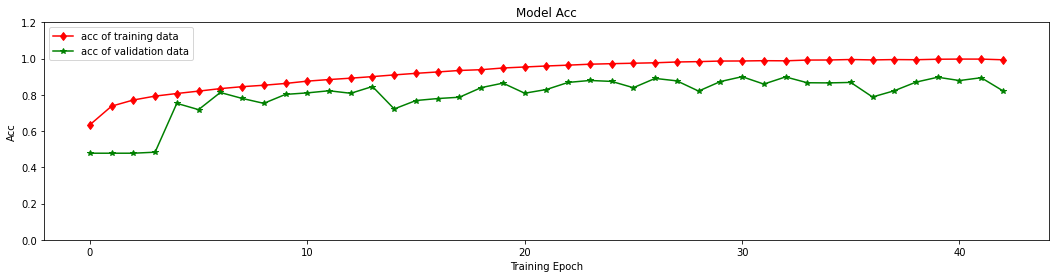

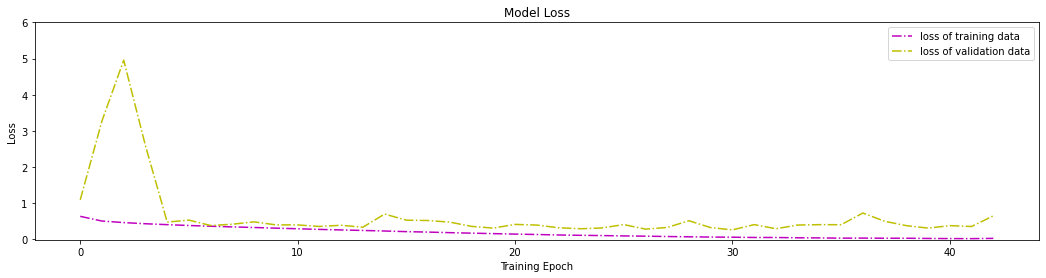

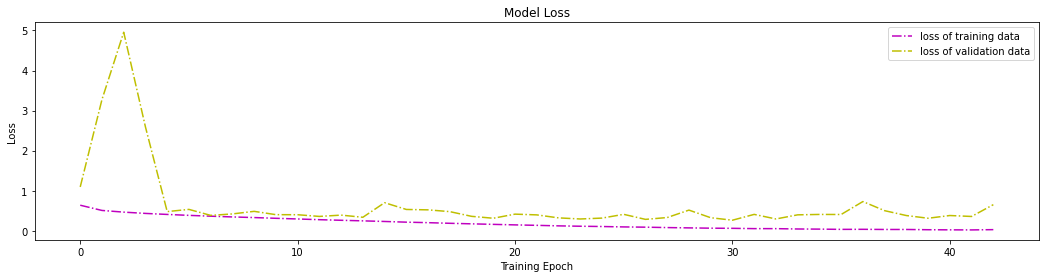

x_train.shape=(23040, 81, 81, 81), x_label.shape=(23040, 1)
x_train_NR.shape=(23040, 81, 81, 81, 1), x_label_R.shape=(23040, 2)
Train on 20736 samples, validate on 2304 samples
Epoch 1/500
20736/20736 [==============================] - 176s 8ms/step - loss: 0.6443 - accuracy: 0.6081 - val_loss: 0.8039 - val_accuracy: 0.4965
Epoch 2/500
20736/20736 [==============================] - 165s 8ms/step - loss: 0.5483 - accuracy: 0.7157 - val_loss: 2.2714 - val_accuracy: 0.4965
Epoch 3/500
20736/20736 [==============================] - 164s 8ms/step - loss: 0.5121 - accuracy: 0.7611 - val_loss: 3.7726 - val_accuracy: 0.4965
Epoch 4/500
20736/20736 [==============================] - 181s 9ms/step - loss: 0.4841 - accuracy: 0.7844 - val_loss: 2.7333 - val_accuracy: 0.5030
Epoch 5/500
20736/20736 [==============================] - 155s 7ms/step - loss: 0.4595 - accuracy: 0.8036 - val_loss: 0.6993 - val_accuracy: 0.6740
Epoch 6/500
20736/20736 [==============================] - 150s 7ms/step - los

20736/20736 [==============================] - 167s 8ms/step - loss: 0.0312 - accuracy: 0.9929 - val_loss: 0.7979 - val_accuracy: 0.7721
Epoch 55/500
20736/20736 [==============================] - 180s 9ms/step - loss: 0.0274 - accuracy: 0.9938 - val_loss: 0.5928 - val_accuracy: 0.8138
Epoch 56/500
20736/20736 [==============================] - 171s 8ms/step - loss: 0.0260 - accuracy: 0.9941 - val_loss: 0.3277 - val_accuracy: 0.8906
Epoch 57/500
20736/20736 [==============================] - 180s 9ms/step - loss: 0.0184 - accuracy: 0.9976 - val_loss: 0.5421 - val_accuracy: 0.8385
Epoch 58/500
20736/20736 [==============================] - 184s 9ms/step - loss: 0.0159 - accuracy: 0.9979 - val_loss: 0.9171 - val_accuracy: 0.7691
Epoch 59/500
20736/20736 [==============================] - 183s 9ms/step - loss: 0.0251 - accuracy: 0.9939 - val_loss: 0.3077 - val_accuracy: 0.9058
Epoch 60/500
20736/20736 [==============================] - 183s 9ms/step - loss: 0.0245 - accuracy: 0.9938 - val

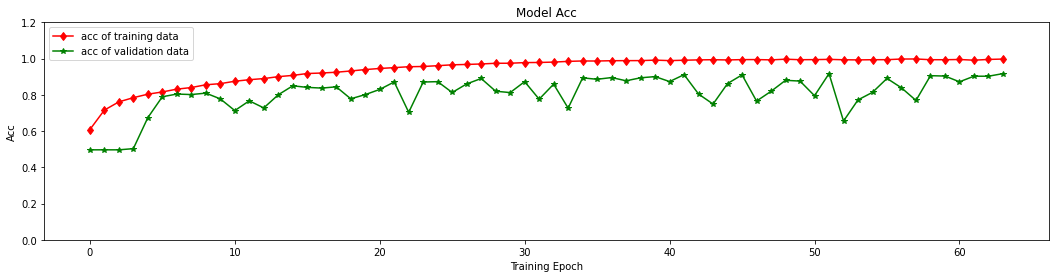

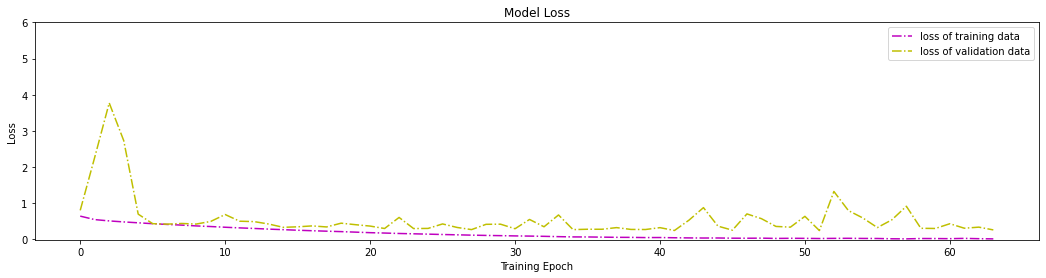

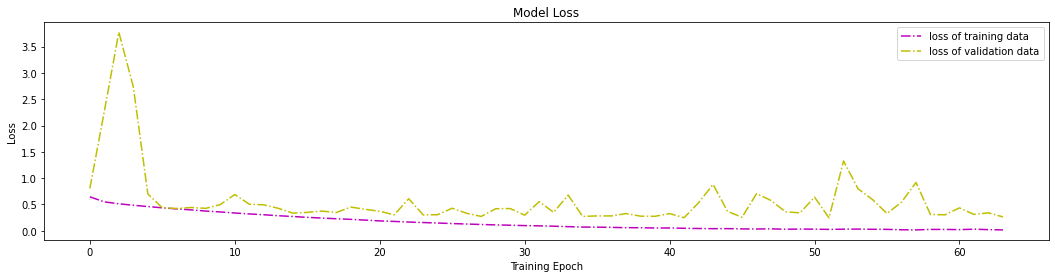

x_train.shape=(23040, 81, 81, 81), x_label.shape=(23040, 1)
x_train_NR.shape=(23040, 81, 81, 81, 1), x_label_R.shape=(23040, 2)
Train on 20736 samples, validate on 2304 samples
Epoch 1/500
20736/20736 [==============================] - 156s 8ms/step - loss: 0.6005 - accuracy: 0.6569 - val_loss: 1.1607 - val_accuracy: 0.5000
Epoch 2/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.4994 - accuracy: 0.7540 - val_loss: 3.4028 - val_accuracy: 0.5000
Epoch 3/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.4609 - accuracy: 0.7775 - val_loss: 5.1203 - val_accuracy: 0.5000
Epoch 4/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.4362 - accuracy: 0.7919 - val_loss: 1.5673 - val_accuracy: 0.5230
Epoch 5/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.4169 - accuracy: 0.8030 - val_loss: 0.4306 - val_accuracy: 0.7812
Epoch 6/500
20736/20736 [==============================] - 147s 7ms/step - los

20736/20736 [==============================] - 147s 7ms/step - loss: 0.0249 - accuracy: 0.9934 - val_loss: 0.7798 - val_accuracy: 0.8086
Epoch 55/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 1.7468 - val_accuracy: 0.6636
Epoch 56/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0274 - accuracy: 0.9921 - val_loss: 0.3777 - val_accuracy: 0.8776
Epoch 57/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0213 - accuracy: 0.9949 - val_loss: 0.2823 - val_accuracy: 0.9201
Epoch 58/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0157 - accuracy: 0.9967 - val_loss: 0.3024 - val_accuracy: 0.9076
Epoch 59/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.2941 - val_accuracy: 0.9154
Epoch 60/500
20736/20736 [==============================] - 147s 7ms/step - loss: 0.0270 - accuracy: 0.9916 - val

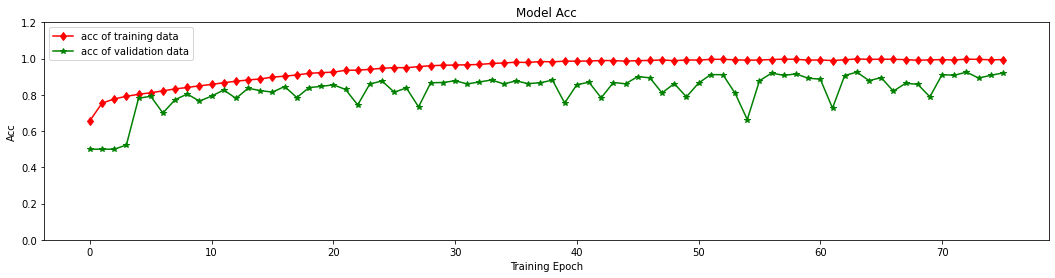

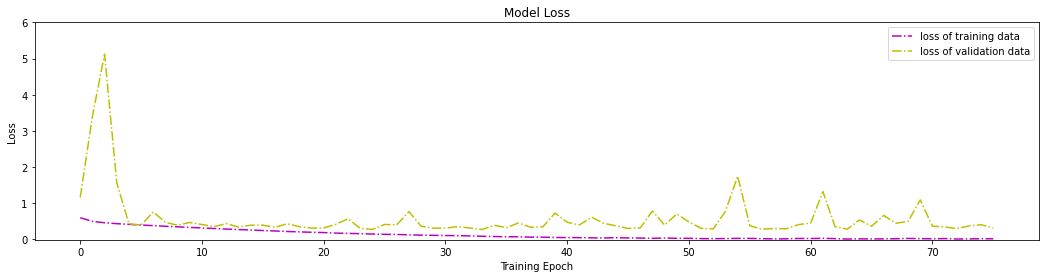

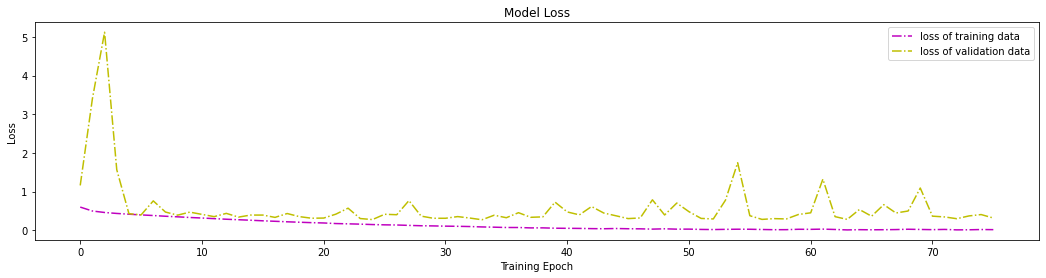

In [7]:
##-----------------------------------------------------------------------------
## CNN
##-----------------------------------------------------------------------------

TrainRun = 0
TrainModel = 3
MODELS = 1
for F in range(TrainModel):
    F = F + 1
    path = os.path.join(str(F), 'T'+ str(TrainRun))
    os.makedirs(path)

    
    EPOCHS = 500
    
    ##-----------------------------------------------------------------------------
    ## Training set & Testing set
    ##-----------------------------------------------------------------------------
    # rearrange the order of Intensity & Type
    #np.random.seed(1234)
    r = np.random.permutation(len(Intensity))
    x_train = Intensity[r]
    x_label = Type[r] -1    # 1,2----> 0,1
    print("x_train.shape={}, x_label.shape={}".format(x_train.shape, x_label.shape))

    ##-----------------------------------------------------------------------------
    ## Normalize Training set (z-score : (x-x.mean)/x.std)
    ##-----------------------------------------------------------------------------

    #x_train_Norm = np.zeros((x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3]))
    #for iNum_Atom in range(x_train.shape[0]):
    #    x_train_Norm[iNum_Atom,:,:,:] = (x_train[iNum_Atom,:,:,:] - x_train[iNum_Atom,:,:,:].mean() )/ x_train[iNum_Atom,:,:,:].std()
    #print("x_train_Norm.shape={}".format(x_train_Norm.shape))    

    ##-----------------------------------------------------------------------------
    ## Reshape Training set & x_label ---> one hot
    ##-----------------------------------------------------------------------------
    x_train_NR = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], 1)
    x_label_R = np_utils.to_categorical(x_label, num_classes=2)

    print("x_train_NR.shape={}, x_label_R.shape={}".format(x_train_NR.shape, x_label_R.shape))
    ##-----------------------------------------------------------------------------
    ## CNN Model
    ##-----------------------------------------------------------------------------
    from keras import optimizers
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPooling3D, BatchNormalization
    from keras.layers import LeakyReLU, Activation
    from keras.callbacks import EarlyStopping
    early_stopping_monitor = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=12, verbose=2, mode='max', 
                                           restore_best_weights=True)

    from keras import backend as K

    tic1 = time.time()

    fp = open(str(F) + "/T" + str(TrainRun) + "/TrainingResult.txt", "w")  #####------------------------------ print
    fp_alltrainmodel = open(str(F) + "/T" + str(TrainRun) + "/AllTrainingModel.txt", "w") #####------------------------------ print
    fp_allvalidmodel = open("AllVaildationSet.txt", "w") #####------------------------------ print
    #----------------------------------------------------------------------------------------------------------------------

    #sess = tf.InteractiveSession()
    for m in range(MODELS):
        model = Sequential()
        model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', input_shape=(81,81,81,1), kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        model.add(Conv3D(filters=8, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))

        #model.add(Conv3D(filters=16, kernel_size=(3,3,3), padding='same', kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))        
        #model.add(Dropout(0.25))

        model.add(Flatten())

        #model.add(Dense(4096, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        #model.add(Dense(64, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2)) 
        #model.add(Dropout(0.5))

        #model.add(Dense(256, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))
        
        #model.add(Dense(128, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        #model.add(Dense(64, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))
        
        #model.add(Dense(32, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        #model.add(Dense(64, kernel_initializer="normal"))
        #model.add(BatchNormalization())
        #model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))


        model.add(Dense(8, kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        model.add(Dense(4, kernel_initializer="normal"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.5))

        model.add(Dense(2, activation='softmax'))

        optimizerAdam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
        #model.compile(loss=focal_loss, optimizer=optimizerAdam, metrics=['accuracy'])
        model.compile(loss='categorical_crossentropy', optimizer=optimizerAdam, metrics=['accuracy']) 
        #optimizerRMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, decay=0.0)
        #model.compile(loss='binary_crossentropy', optimizer=optimizerRMSprop, metrics=['accuracy']) 


        #sess = tf.InteractiveSession()
        #gpu_options = tf.GPUOptions(allow_growth=True)
        #sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
        # 設定 Keras 使用的 Session
        #    tf.keras.backend.set_session(sess) 
        #reset_keras()
        #sess.run(tf.global_variables_initializer())

        tic0 = time.time()
        #------------------------------------------------------------------------------------------------------------------
        fp_trainmodel = open(str(F) + "/T" + str(TrainRun) + "/TrainingModel%s.txt" %(m), "w") #####------------------------------ print
        fp_validmodel = open(str(F) + "/T" + str(TrainRun) + "VaildationSet%s.txt" %(m), "w") #####------------------------------ print
        #------------------------------------------------------------------------------------------------------------------
        #model.load_weights('my_CNNmodel_%d.h5'%(m))
        #model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 
        train_history=model.fit(x = x_train_NR, y = x_label_R, validation_split=0.1, validation_data=None, epochs=EPOCHS, 
                                batch_size=128, verbose=1, shuffle=True, callbacks = [early_stopping_monitor])

        train_loss, train_accuracy = model.evaluate(x_train_NR, x_label_R)
        #-------------------
        toc0 = time.time()
        #-------------------
        model.save(str(F) + '/my_CNNmodel_%d.h5'%(m))    
        #----------------------------------------------------------------------       
        # Print loss & acc
        #------------------------------------------------------------------------------------------------------------------
        for e in range(early_stopping_monitor.stopped_epoch):
            trainmodellines1 = ("%4d, %10.3e, %4.6g\n"%(e, train_history.history['loss'][e], 
                                                           train_history.history['accuracy'][e]))
            fp_trainmodel.writelines(trainmodellines1)
            alltrainmodellines1 = ("%4d, %4d, %10.3e, %4.6g\n"%(m, e, train_history.history['loss'][e], 
                                                                      train_history.history['accuracy'][e]))
            fp_alltrainmodel.writelines(alltrainmodellines1)            
            #------------------ valid    
            validmodellines1 = ("%4d, %10.3e, %4.6g\n"%(e, train_history.history['val_loss'][e], 
                                                           train_history.history['val_accuracy'][e]))
            fp_validmodel.writelines(validmodellines1)
            allvalidmodellines1 = ("%4d, %4d, %10.3e, %4.6g\n"%(m, e, train_history.history['val_loss'][e], 
                                                                      train_history.history['val_accuracy'][e]))
            fp_allvalidmodel.writelines(allvalidmodellines1)        
        fp_trainmodel.close() #####------------------------------ print
        fp_validmodel.close() #####------------------------------ print
        #------------------------------------------------------------------------------------------------------------------
        print("Training %s is completed!"%(m))
        print("Time=" + str((toc0-tic0)) + "sec")
        lines1 = ("model: %4d, epoch: %4d, train_loss: %10.3e, train accuracy: %4.6g, time: %4.6g\n"
                  %(m, e, train_loss, train_accuracy, toc0-tic0))
        fp.writelines(lines1)
        #-------------------
        K.clear_session()
        #tf.keras.backend.clear_session()
        #K.clear_session()
        #del model
        #sess.close()
        #model.reset_states()
    #----------------------------------------------------------------------------------------------------------------------    
    toc1 = time.time()
    print("------------------------------------------------------------------------------------------------------") 
    print("All Training is completed!")
    print("All Time=" + str((toc1-tic1)) + "sec")

    lines2 = "All Time=" + str((toc1-tic1)) + "sec\n"
    fp.writelines(lines2)

    fp.close()#####------------------------------ print
    fp_alltrainmodel.close() #####------------------------------ print
    fp_allvalidmodel.close() #####------------------------------ print
    
    plt.figure(figsize=(18, 4))
    plt.plot(train_history.history['accuracy'], "r-d", label="acc of training data")
    plt.plot(train_history.history['val_accuracy'], "g-*", label="acc of validation data")
    plt.title('Model Acc')
    plt.ylabel('Acc')
    plt.xlabel('Training Epoch')
    plt.ylim([0, 1.2])
    plt.legend()
    plt.savefig(str(F) + "/R" + str(F) + "_" + 'acc-{}.png'.format(TrainRun+1), format='png')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(train_history.history['loss'], "m-.", label="loss of training data")
    plt.plot(train_history.history['val_loss'], "y-.", label="loss of validation data")
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    plt.ylim([-0.01,6.0])
    plt.legend()
    plt.savefig(str(F) + "/R" + str(F) + "_" + 'loss-{}.png'.format(TrainRun+1), format='png')
    plt.show()
    
    plt.figure(figsize=(18, 4))
    plt.plot(train_history.history['loss'], "m-.", label="loss of training data")
    plt.plot(train_history.history['val_loss'], "y-.", label="loss of validation data")
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    #plt.ylim([-0.01,8.0])
    plt.legend()
    plt.savefig(str(F) + "/R" + str(F) + "_" + 'lossR-{}.png'.format(TrainRun+1), format='png')
    plt.show()


